In [2]:
from modules.training_models.best_cnn_mel_spectrogram import SpeechEmotionRecognitionModelUsingMelSpectrogram
from keras.models import load_model
import matplotlib.pyplot as plt


ModuleNotFoundError: No module named 'modules'

In [2]:
def plot_loss(history):
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(train_loss) + 1)

    plt.plot(epochs, train_loss, 'b', label='Training loss')
    plt.plot(epochs, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

def plot_accuracy(history):
    train_accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    epochs = range(1, len(train_accuracy) + 1)

    plt.plot(epochs, train_accuracy, 'b', label='Training accuracy')
    plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

In [3]:
ser_model = SpeechEmotionRecognitionModelUsingMelSpectrogram()

d:\data_analysis\speech_emotion_recognition\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
ser_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 12, 12, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     4,719,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │         3,591 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,111,111 (19.50 MB)

 Trainable params: 5,111,111 (19.50 MB)

 Non-trainable params: 0 (0.00 B)

**Thử nghiệm mô hình trên 256 n_mels**

In [5]:
from config.eng_config import Config

In [6]:
def get_n_mels_paths(n_mels):
    train_path = Config.n_mels_config[n_mels].train_path
    validation_path = Config.n_mels_config[n_mels].validation_path
    test_path = Config.n_mels_config[n_mels].test_path
    return train_path, validation_path, test_path

In [7]:
def get_train_test_val_data(n_mels):
    train_path, test_path, val_path = get_n_mels_paths(n_mels)
    X_train, y_train = ser_model.process_data(train_path)
    X_val, y_val = ser_model.process_data(val_path)
    X_test, y_test = ser_model.process_data(test_path)
    return X_train, y_train, X_val, y_val, X_test, y_test

In [8]:
def train_model(n_mels):
    X_train, y_train, X_val, y_val, X_test, y_test = get_train_test_val_data(n_mels)
    history = ser_model.train(X_train, y_train, X_val, y_val, n_mels)
    plot_loss(history)
    plot_accuracy(history)
    model = load_model(f'best_cnn_model_weights_using_mel_spectrogram_{n_mels}.keras')
    test_loss, test_accuracy = model.evaluate(X_test, y_test)
    print("Test Loss:", test_loss)
    print("Test Accuracy:", test_accuracy)

Epoch 1/50
436/436 ━━━━━━━━━━━━━━━━━━━━ 110s 250ms/step - accuracy: 0.2108 - loss: 1.8560 - val_accuracy: 0.4123 - val_loss: 1.5219 - learning_rate: 8.0000e-05
Epoch 2/50
436/436 ━━━━━━━━━━━━━━━━━━━━ 93s 212ms/step - accuracy: 0.4404 - loss: 1.4406 - val_accuracy: 0.5055 - val_loss: 1.2460 - learning_rate: 8.0000e-05
Epoch 3/50
436/436 ━━━━━━━━━━━━━━━━━━━━ 91s 208ms/step - accuracy: 0.5314 - loss: 1.2054 - val_accuracy: 0.5499 - val_loss: 1.1437 - learning_rate: 8.0000e-05
Epoch 4/50
436/436 ━━━━━━━━━━━━━━━━━━━━ 86s 197ms/step - accuracy: 0.5701 - loss: 1.1106 - val_accuracy: 0.5779 - val_loss: 1.0839 - learning_rate: 8.0000e-05
Epoch 5/50
436/436 ━━━━━━━━━━━━━━━━━━━━ 86s 197ms/step - accuracy: 0.5961 - loss: 1.0473 - val_accuracy: 0.5900 - val_loss: 1.0581 - learning_rate: 8.0000e-05
Epoch 6/50
436/436 ━━━━━━━━━━━━━━━━━━━━ 86s 197ms/step - accuracy: 0.6126 - loss: 0.9929 - val_accuracy: 0.6035 - val_loss: 1.0085 - learning_rate: 8.0000e-05
Epoch 7/50
436/436 ━━━━━━━━━━━━━━━━━━━━ 86s 1

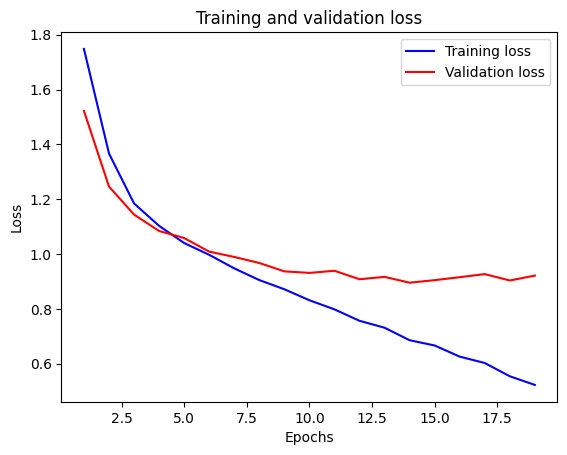

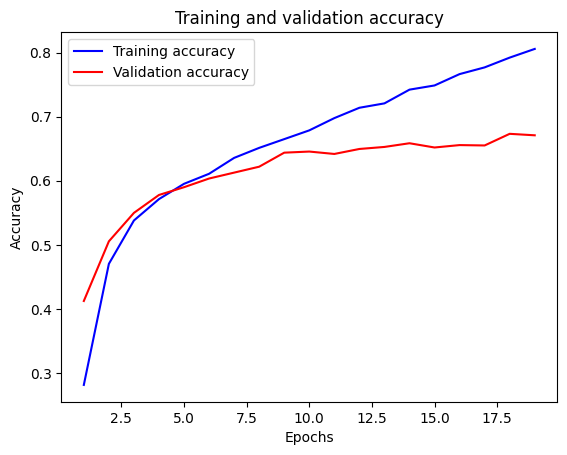

110/110 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.6621 - loss: 0.9212
Test Loss: 0.9024806618690491
Test Accuracy: 0.6652409434318542


In [9]:
train_model(128)

Epoch 1/50
436/436 ━━━━━━━━━━━━━━━━━━━━ 111s 244ms/step - accuracy: 0.2222 - loss: 1.8414 - val_accuracy: 0.4461 - val_loss: 1.5223 - learning_rate: 8.0000e-05
Epoch 2/50
436/436 ━━━━━━━━━━━━━━━━━━━━ 81s 185ms/step - accuracy: 0.4567 - loss: 1.4106 - val_accuracy: 0.5219 - val_loss: 1.2204 - learning_rate: 8.0000e-05
Epoch 3/50
436/436 ━━━━━━━━━━━━━━━━━━━━ 79s 182ms/step - accuracy: 0.5329 - loss: 1.1861 - val_accuracy: 0.5588 - val_loss: 1.1186 - learning_rate: 8.0000e-05
Epoch 4/50
436/436 ━━━━━━━━━━━━━━━━━━━━ 80s 183ms/step - accuracy: 0.5733 - loss: 1.0953 - val_accuracy: 0.5770 - val_loss: 1.0670 - learning_rate: 8.0000e-05
Epoch 5/50
436/436 ━━━━━━━━━━━━━━━━━━━━ 115s 263ms/step - accuracy: 0.6004 - loss: 1.0354 - val_accuracy: 0.5810 - val_loss: 1.0312 - learning_rate: 8.0000e-05
Epoch 6/50
436/436 ━━━━━━━━━━━━━━━━━━━━ 142s 326ms/step - accuracy: 0.6192 - loss: 0.9828 - val_accuracy: 0.6070 - val_loss: 1.0072 - learning_rate: 8.0000e-05
Epoch 7/50
436/436 ━━━━━━━━━━━━━━━━━━━━ 142

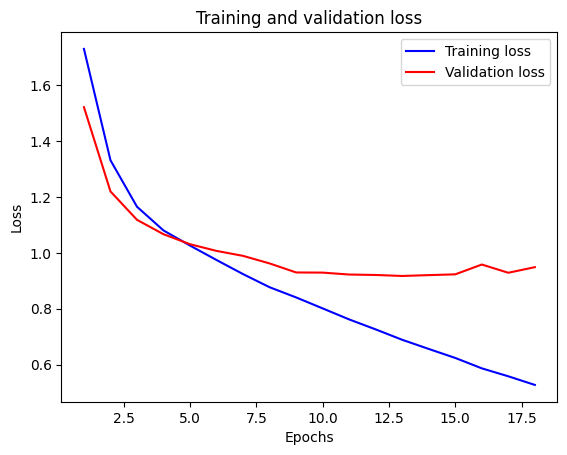

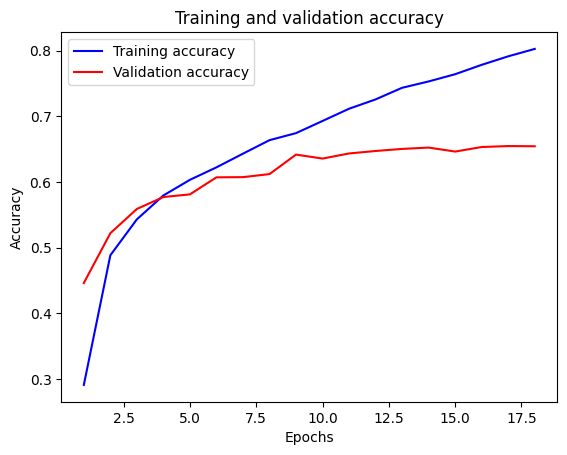

110/110 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.6579 - loss: 0.8661
Test Loss: 0.8951994776725769
Test Accuracy: 0.6581123471260071


In [11]:
train_model(256)

Epoch 1/50
436/436 ━━━━━━━━━━━━━━━━━━━━ 108s 245ms/step - accuracy: 0.1914 - loss: 1.8797 - val_accuracy: 0.4002 - val_loss: 1.5705 - learning_rate: 8.0000e-05
Epoch 2/50
436/436 ━━━━━━━━━━━━━━━━━━━━ 101s 230ms/step - accuracy: 0.4159 - loss: 1.4952 - val_accuracy: 0.5208 - val_loss: 1.2617 - learning_rate: 8.0000e-05
Epoch 3/50
436/436 ━━━━━━━━━━━━━━━━━━━━ 102s 234ms/step - accuracy: 0.5224 - loss: 1.2223 - val_accuracy: 0.5629 - val_loss: 1.1416 - learning_rate: 8.0000e-05
Epoch 4/50
436/436 ━━━━━━━━━━━━━━━━━━━━ 102s 233ms/step - accuracy: 0.5642 - loss: 1.1213 - val_accuracy: 0.5753 - val_loss: 1.0886 - learning_rate: 8.0000e-05
Epoch 5/50
436/436 ━━━━━━━━━━━━━━━━━━━━ 103s 236ms/step - accuracy: 0.5870 - loss: 1.0549 - val_accuracy: 0.5885 - val_loss: 1.0379 - learning_rate: 8.0000e-05
Epoch 6/50
436/436 ━━━━━━━━━━━━━━━━━━━━ 147s 246ms/step - accuracy: 0.6151 - loss: 0.9969 - val_accuracy: 0.5995 - val_loss: 1.0111 - learning_rate: 8.0000e-05
Epoch 7/50
436/436 ━━━━━━━━━━━━━━━━━━━━ 

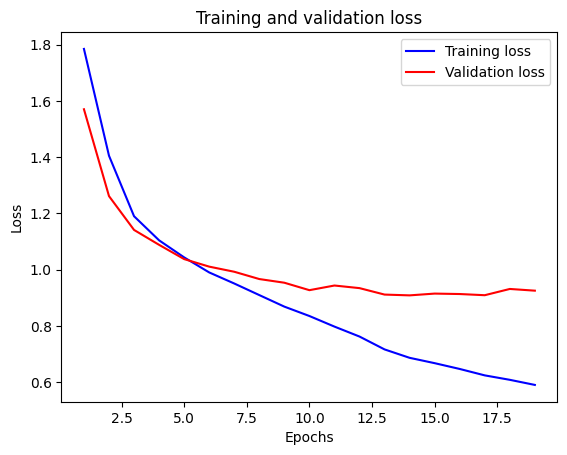

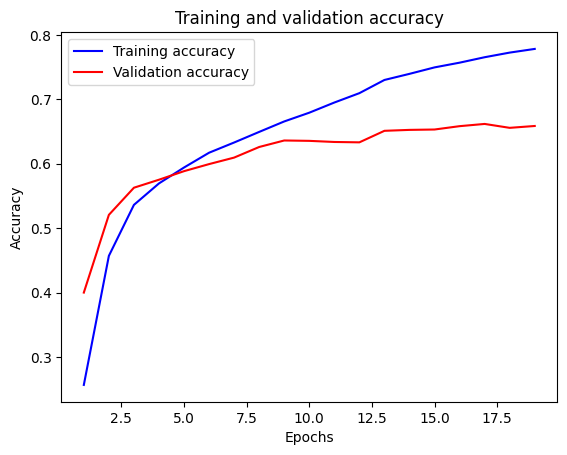

110/110 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.6587 - loss: 0.9070
Test Loss: 0.9229711890220642
Test Accuracy: 0.6452808380126953


In [11]:
train_model(512)